# Enfoque clásico de series de tiempo 


**Estadística Aplicada**

**Raúl Flores Robles 1838148**

**Sesión 12 - 17 de marzo 2023**

En el enfoque clásico de series de tiempo, se considera que una serie se puede descomponer en cuatro elementos:
1. Tendencia "T"
2. Ciclo "C"
3. Estacional "S"
4. Irregular "E"

Usualmente se considera que no es posible separar la tendencia del ciclo, por lo que se presentan juntos en lo que se llama tendencia-ciclo (tendencia).

In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [15]:
# Modelo ETS(Error-Trend-Seasonally)
# Modelo de tendencia(ciclo)-estacional-irregular
from statsmodels.tsa.api import seasonal_decompose

In [16]:
# base de datos 
pasajeros= pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv')

In [17]:
pasajeros.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [18]:
pasajeros = pasajeros.rename(columns={'Month':'mes','Thousands of Passengers':'miles de pasajeros'})
pasajeros.head()

,mes,miles de pasajeros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [19]:
pasajeros['mes']= pd.to_datetime(pasajeros['mes'])

In [20]:
pasajeros.head()

,mes,miles de pasajeros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [21]:
pasajeros = pasajeros.set_index('mes')

In [23]:
pasajeros.head()

,miles de pasajeros
mes,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [24]:
pasajeros.index.freq= 'MS'

In [25]:
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='mes', length=144, freq='MS')

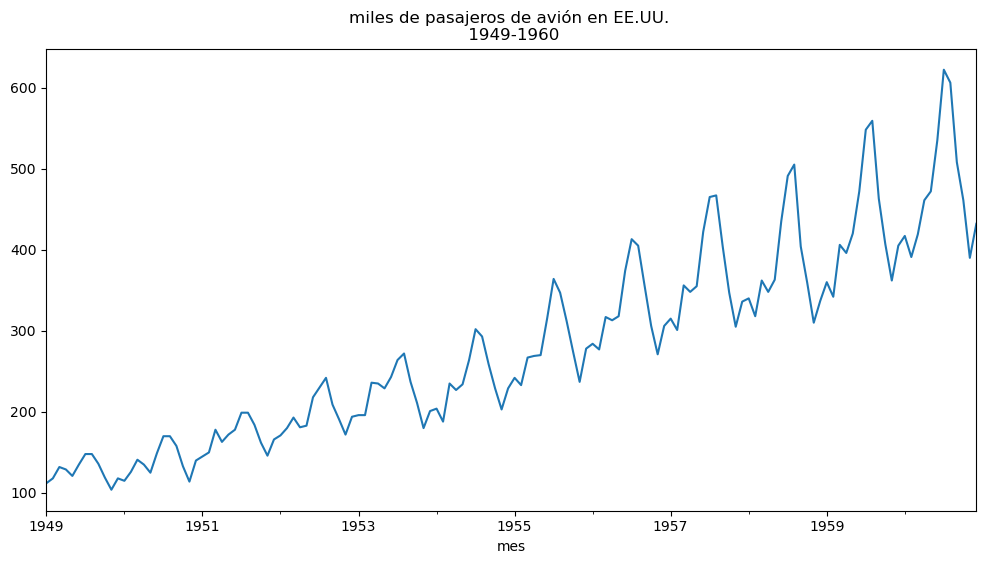

In [32]:
pasajeros['miles de pasajeros'].plot(figsize=(12,6));
plt.title('miles de pasajeros de avión en EE.UU. \n 1949-1960');

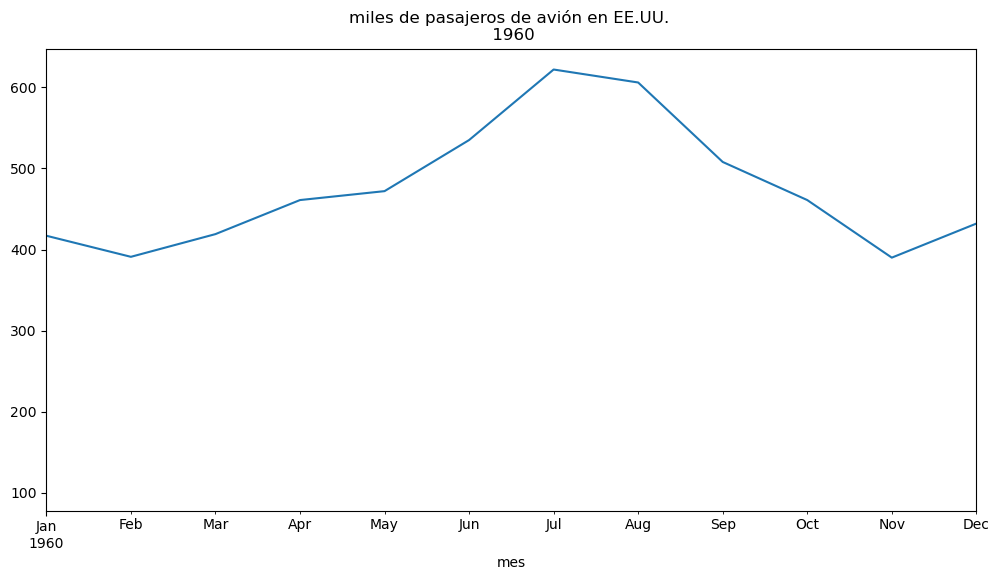

In [33]:
pasajeros['miles de pasajeros'].plot(figsize=(12,6));
plt.title('miles de pasajeros de avión en EE.UU. \n 1960')
plt.xlim('1960-01','1960-12');

In [35]:
serieETS= seasonal_decompose(pasajeros['miles de pasajeros'], model='mult')

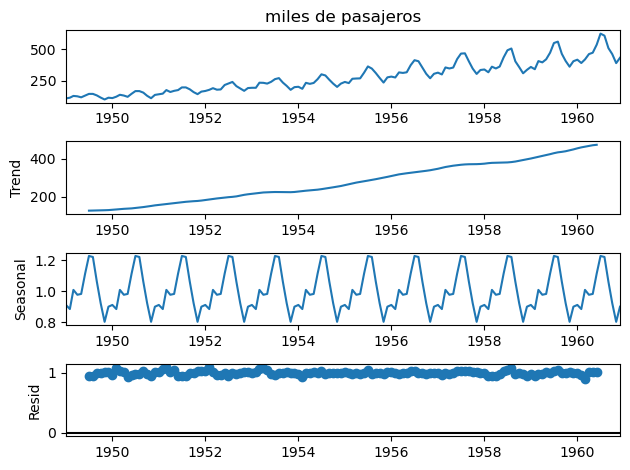

In [40]:
serieETS.plot()
plt.show()

Una serie desestacionalizada (Seasonally Adjusted) es una serie sin su componente estacional

In [ ]:
#estacional
serieETS.seasonal

#tendencia(ciclo)
serieETS.trend

#irregular
serieETS.resid

In [37]:
pasajeros['desestacionalizada']= pasajeros['miles de pasajeros']/serieETS.seasonal

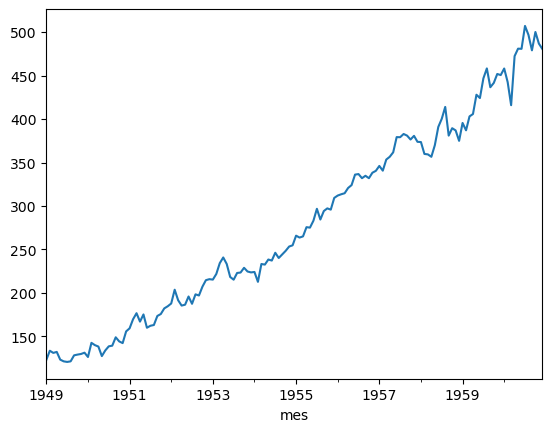

In [39]:
pasajeros['desestacionalizada'].plot();

In [64]:
confirmados= pd.read_excel('covid_mex.xlsx')

In [65]:
confirmados.head()

,fecha,aguascalientes,baja california,baja california sur,campeche,chiapas,chihuahua,distrito federal,coahuila,colima,...,san luis potosi,sinaloa,sonora,tabasco,tamaulipas,tlaxcala,veracruz,yucatan,zacatecas,nacional
0,2020-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-27,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2020-02-28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,2020-02-29,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [66]:
confirmados['fecha'] = pd.to_datetime(confirmados['fecha'])

In [67]:
confirmados= confirmados.set_index('fecha')

In [68]:
confirmados.index.freq = 'D'

In [69]:
confirmados.index

DatetimeIndex(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06',
               ...
               '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
               '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14',
               '2023-03-15', '2023-03-16'],
              dtype='datetime64[ns]', name='fecha', length=1115, freq='D')

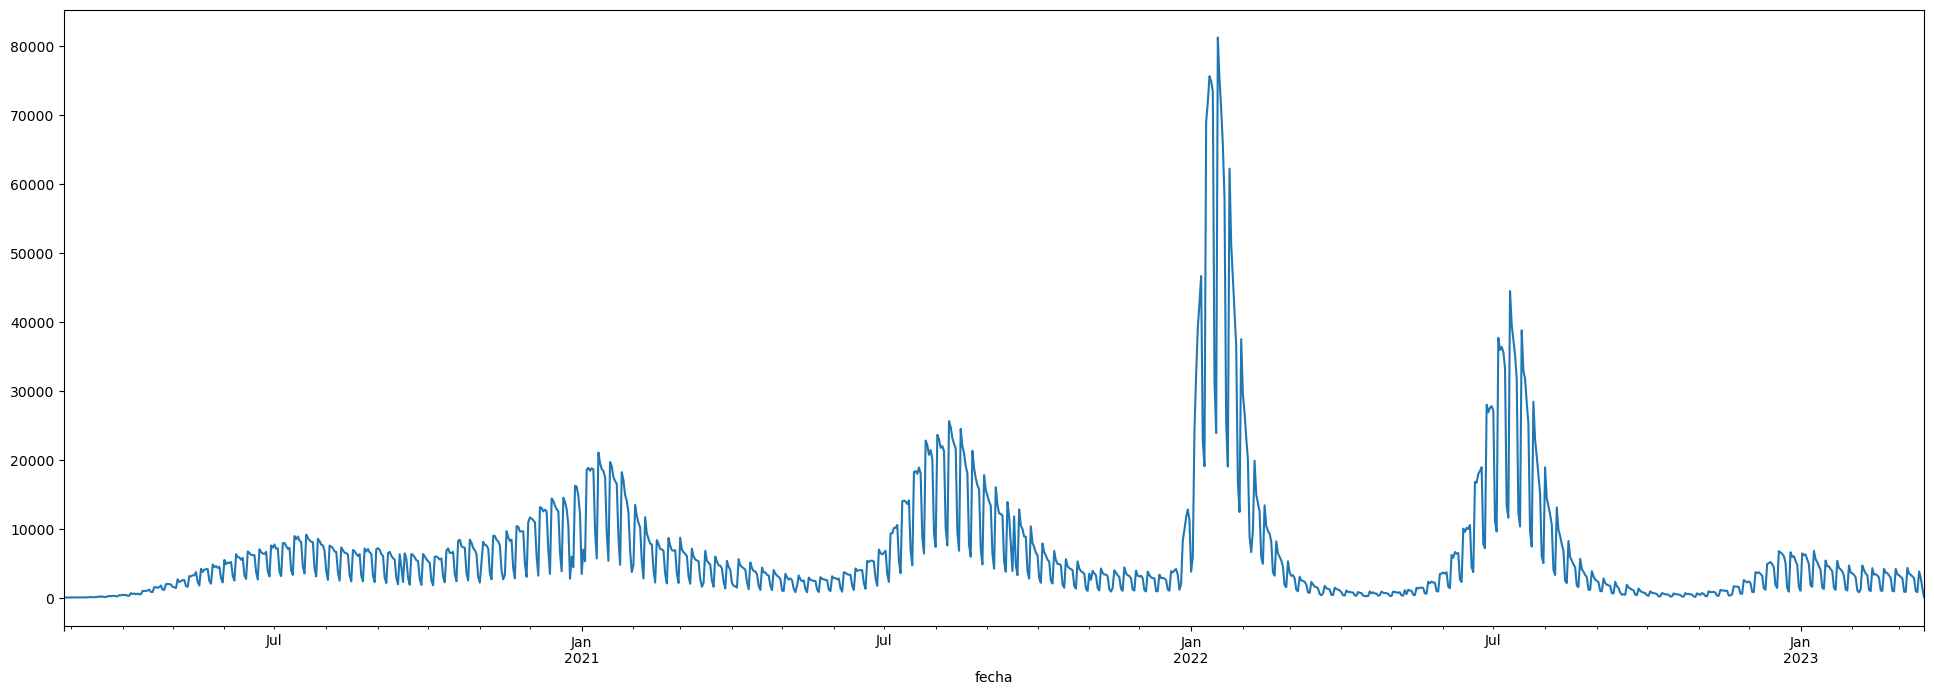

In [72]:
confirmados['nacional'].plot(figsize=(24,8));

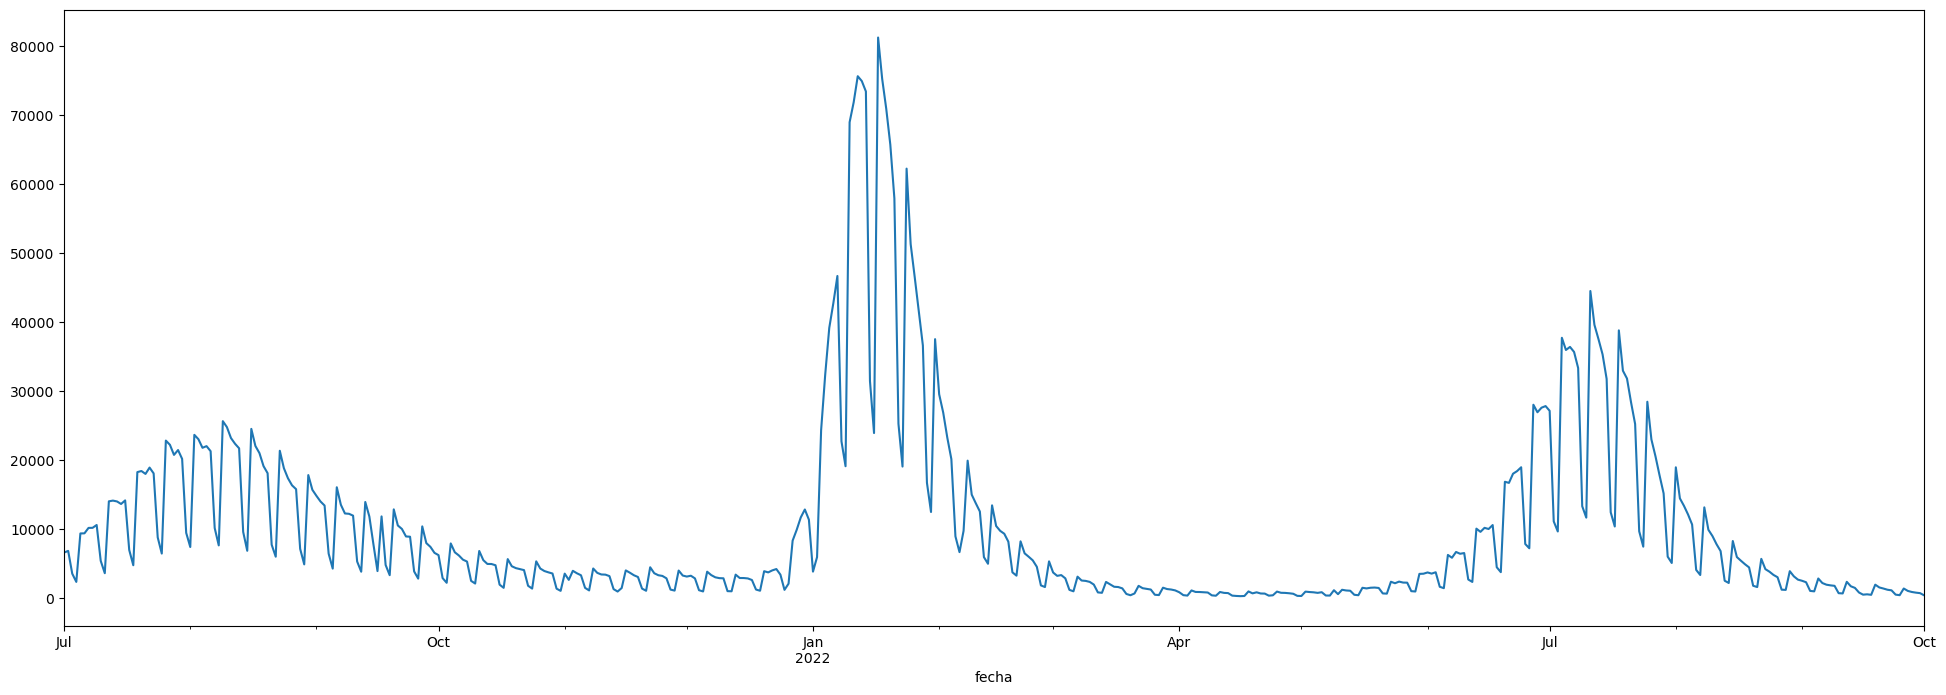

In [71]:
confirmados['nacional'].plot(figsize=(24,8));
plt.xlim('2021-07','2022-10');

In [73]:
serie2= seasonal_decompose(confirmados['nacional'],model='ad')

In [75]:
confirmados['tendencia nacional']= serie2.trend

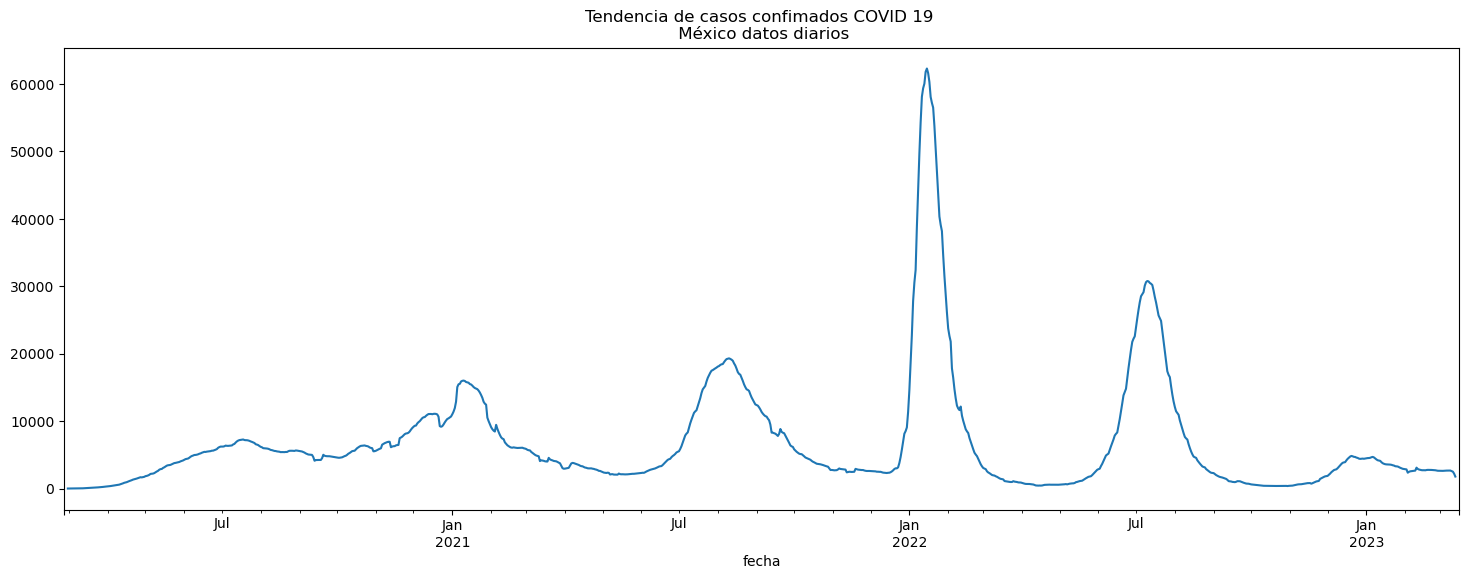

In [76]:
confirmados['tendencia nacional'].plot(figsize=(18,6))
plt.title('Tendencia de casos confimados COVID 19 \n México datos diarios')
plt.show()